In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('population_by_country_2020.csv')
Q1 =df[(df['Region'] == 'LATIN')  & (df['Med. Age'] > 0)]
Q1.head()

,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share,Region
7,Argentina,45267449,0.93%,415097,17,2736690,4800.0,2.3,32.0,93%,0.58%,LATIN
9,Aruba,106845,0.43%,452,593,180,201.0,1.9,41.0,44%,0.00%,LATIN
13,Bahamas,393893,0.97%,3762,39,10010,1000.0,1.8,32.0,86%,0.01%,LATIN
16,Barbados,287437,0.12%,350,668,430,-79.0,1.6,40.0,31%,0.00%,LATIN
19,Belize,398845,1.86%,7275,17,22810,1200.0,2.3,25.0,46%,0.01%,LATIN


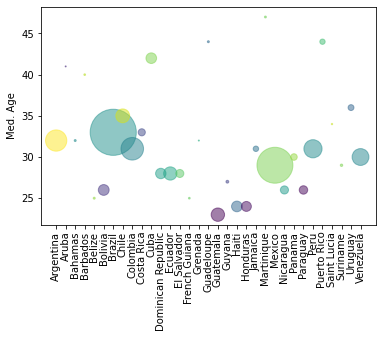

In [3]:
# libraries
import matplotlib.pyplot as plt
import numpy as np

x = (Q1['Country (or dependency)']).to_numpy()
y = (Q1['Med. Age']).to_numpy()
z = (Q1['Population (2020)']).to_numpy()
colors = np.random.rand(len(Q1['Country (or dependency)']))

# use the scatter function
plt.scatter(x, y, s=z/100000, alpha=0.5, c=colors)
plt.xticks(rotation=90)
plt.ylabel("Med. Age")
# show the graph
plt.show()